In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
train = pd.read_csv('./data/basic_features/train.csv', index_col=0)
test = pd.read_csv('./data/basic_features/test.csv', index_col=0)

In [5]:
train_X = train.drop('target', axis=1)
train_Y = train[['target']]
test_X = test.drop('target', axis=1)
test_Y = test[['target']]

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='kd_tree')

In [8]:
knn.fit(train_X, train_Y)

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
train_error = (knn.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y)
test_error = (knn.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y)

In [10]:
[train_error, test_error]

[target    0.785653
 dtype: float64, target    0.707852
 dtype: float64]

<h1> Hyper Parameters Tuning </h1>

In [28]:
train_errors = []
cnt = 0
test_errors = []
n_neighbours_range = range(20, 200, 20)
for n_neighbours in n_neighbours_range:
    dt = KNeighborsClassifier(n_neighbors=n_neighbours)
    dt.fit(train_X, train_Y)
    train_error = ((dt.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y)) ['target']
    test_error = ((dt.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y)) ['target']
    train_errors.append(train_error)
    test_errors.append(test_error)
    cnt = cnt + 1
    print('\r {} %'.format(int((cnt / len(n_neighbours_range)) * 100)), end='')
    

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


 11 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


 22 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


 33 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


 44 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


 55 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


 66 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


 77 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


 88 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


 100 %

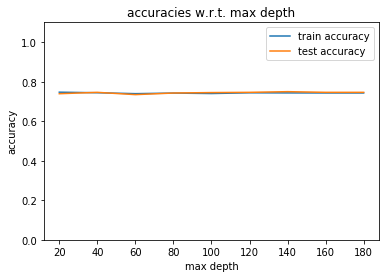

In [30]:
plt.title('accuracies w.r.t. max depth')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.plot(n_neighbours_range, train_errors, label='train accuracy')
plt.plot(n_neighbours_range, test_errors, label='test accuracy')
plt.ylim(0,1.1)
plt.legend()

In [32]:
min(test_errors), min(train_errors)

(0.7344110854503464, 0.7393541011717634)